# Ultimate Inc. Data Analysis Interview Challenge

In [679]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score

### Part 1 - Exploratory Data Analysis - Ultimate Inc. Login Data

In [571]:
# Opening and inspecting .json data
with open('D://Springboard/Take Home Challenges/ultimate_challenge/logins.json') as logins:
    data = json.load(logins)
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [572]:
# Loading json data to a Pandas dataframe
df = pd.read_json('D://Springboard/Take Home Challenges/ultimate_challenge/logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [574]:
# Determining the date range of the time-series data
df['login_time'].min(), df['login_time'].max()

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [575]:
# Downsampling the data to 15 minute intervals and aggregating
df['count'] = 1
df = df.set_index('login_time').resample('15T').sum()
print (df)

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
...                    ...
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6

[9788 rows x 1 columns]


<AxesSubplot:xlabel='login_time'>

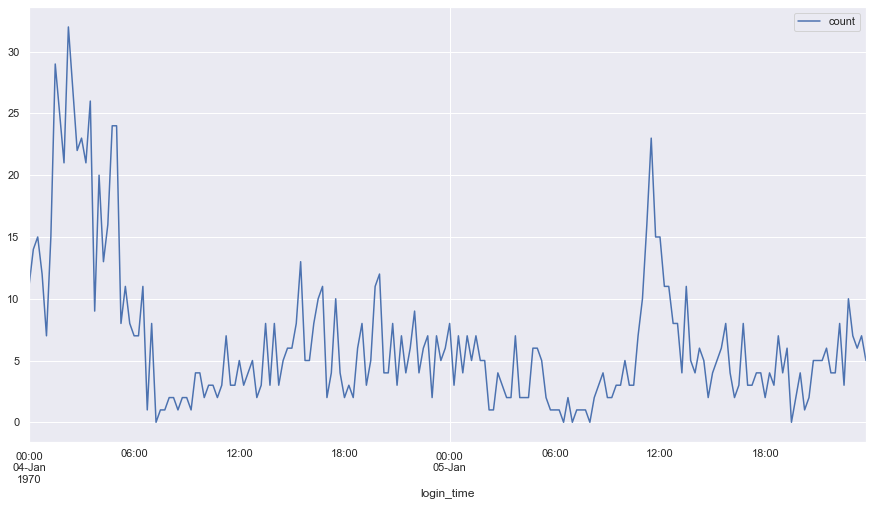

In [576]:
# Using pandas plotting to look at an arbitrary 1-day window
df["1970-01-04":"1970-01-05"].plot()

<AxesSubplot:xlabel='login_time'>

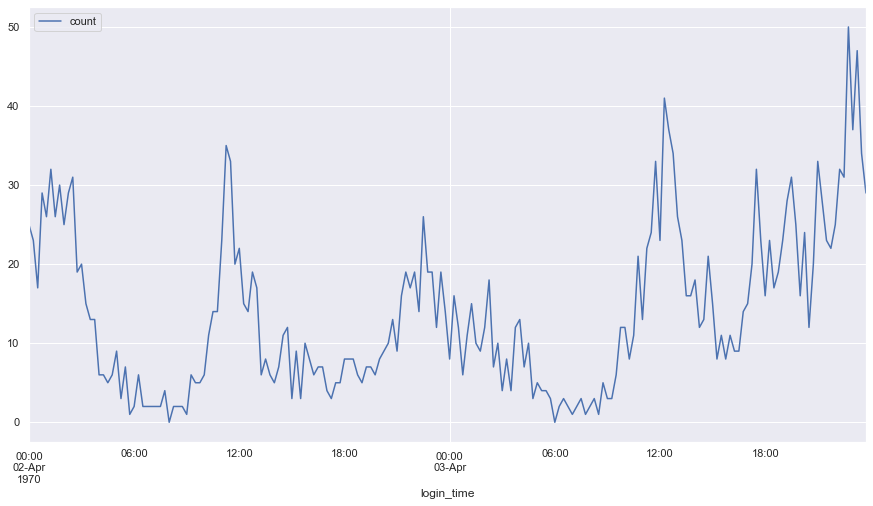

In [577]:
# Using pandas plotting to look at an arbitrary 1-day window
df["1970-04-02":"1970-04-03"].plot()

In [578]:
# Creating a column isolating month
df['month']=df.index.month

# Creating a column containing the day of the week in string form
df['dayname']=df.index.day_name()

# Creating a column isolating day of month
df['day_of_month']=df.index.day

# Creating columns for integer hour and integer minute, and converting to strings
df['minute']=df.index.minute
df['hour']=df.index.hour
df['minute']=df['minute'].astype(str)
df['hour']=df['hour'].astype(str)

# Concatenating hour and minute to create a new column called "time"
df['time']=df['hour'] + ':' + df['minute']

# Ensuring the minute portion of the string has two characters
df['time']=df['time'].str.replace(':0', ':00')

# Turning the 'time' column back into a datetime object
df['time'] = pd.DatetimeIndex(df['time']).time

# Dropping the now-unnecessary 'hour' and 'minute' columns 
df.drop(columns=['hour','minute'], inplace=True)

df.head()


,count,month,dayname,day_of_month,time
login_time,,,,,
1970-01-01 20:00:00,2,1,Thursday,1,20:00:00
1970-01-01 20:15:00,6,1,Thursday,1,20:15:00
1970-01-01 20:30:00,9,1,Thursday,1,20:30:00
1970-01-01 20:45:00,7,1,Thursday,1,20:45:00
1970-01-01 21:00:00,1,1,Thursday,1,21:00:00


In [579]:
df.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   count         9788 non-null   int64 
 1   month         9788 non-null   int64 
 2   dayname       9788 non-null   object
 3   day_of_month  9788 non-null   int64 
 4   time          9788 non-null   object
dtypes: int64(3), object(2)
memory usage: 778.8+ KB


In [581]:
# Creating new re-sampled dataframes at the weekly and daily levels
# Aggregating by mean

data_columns = ['count', 'month']

df_wk_mean = df[data_columns].resample('W').mean()
df_day_mean = df[data_columns].resample('D').mean()

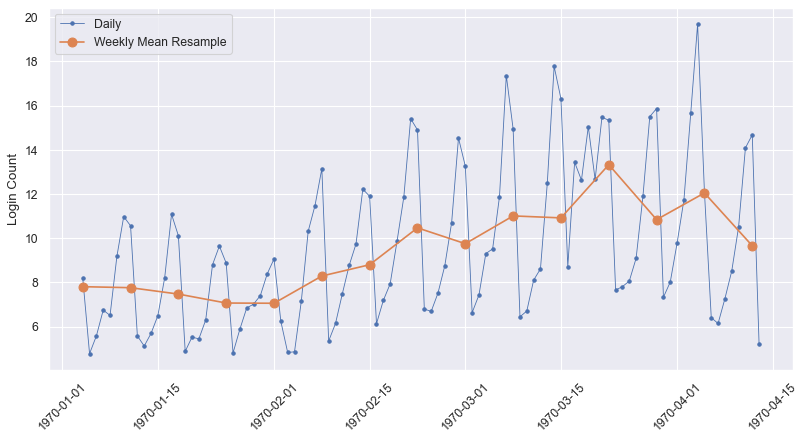

In [582]:
# Setting date window
start, end = '1970-01-04', '1970-04-15'
fig, ax = plt.subplots(figsize=(12,6), dpi=80)
# Creating a subplot for the resampled daily means
ax.plot(df_day_mean.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.75, label='Daily')
# Creating a subplot for the resampled weekly means
ax.plot(df_wk_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
# Plot formatting
ax.set_ylabel('Login Count')
plt.xticks(rotation=45)
ax.legend();

This chart shows the trend of mean daily logins (blue line), as well as the same data resampled to a weekly mean to smooth out intra-week volatility. We see here that there was a slight downward trend during the first 3-4 weeks of the year, but starting in February, there was consistent weekly growth for 7 straight weeks, peaking the last week in March. The week of 4-15 is still incomplete, so it's too early to tell if there's an actual downward trend after the peak, or if we've simply flattened back toward mid-March levels. The second to last week's average actually hints at a possible return to growth, but that's not a certainty.

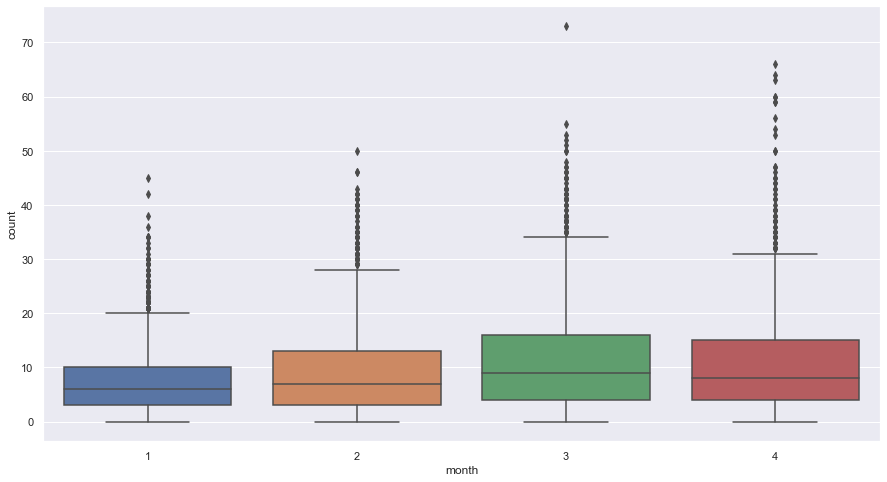

In [583]:
# Creating a boxplot to examine monthly distribution of logins
sns.boxplot(data=df, x='month', y='count');

This box-and-whisker shows the distribution of login counts aggregated by month. It clearly confirms the growth trend from January through March, but it also shows the uncertainty in the April results, having a narrower (and lower) middle 50%, but with more and higher outliers at the top end.

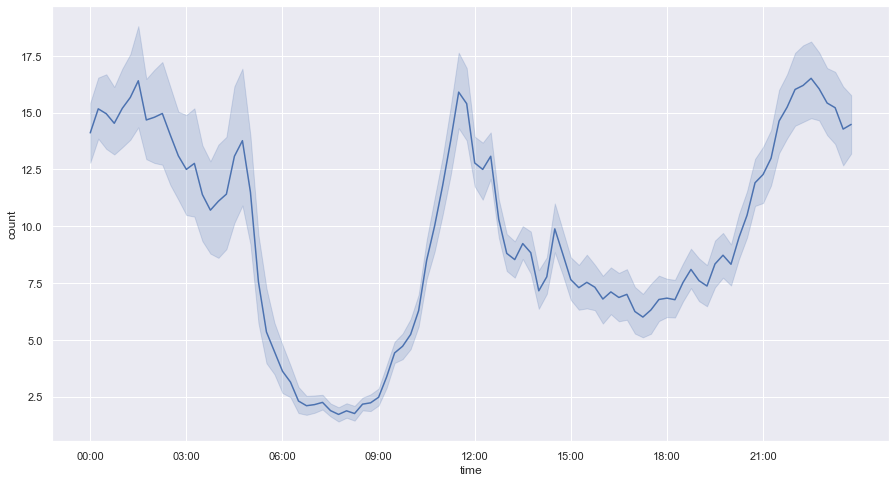

In [584]:
pd.plotting.register_matplotlib_converters()
sns.set(rc = {'figure.figsize':(15,8)})

fif = sns.lineplot(data=df, x="time", y="count")

tix = plt.xticks(['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00'])



There is a very clear daily cycle, with an extended peak in activity overnight between the hours of 21:00 and 3:00, with a much shorter duration peak right around 12:00 each day. These peaks are both at around 15-16 logins per 15 minute interval. Activity rapidly plummets around 4:30, bottoming out at around 10 logins per hour (or 2.5 per 15 minutes) between 6:00 and 9:00. Logins remain fairly flat at around 7.5 per 15 minutes between 13:00 and 20:00, significantly higher than in the other trough.

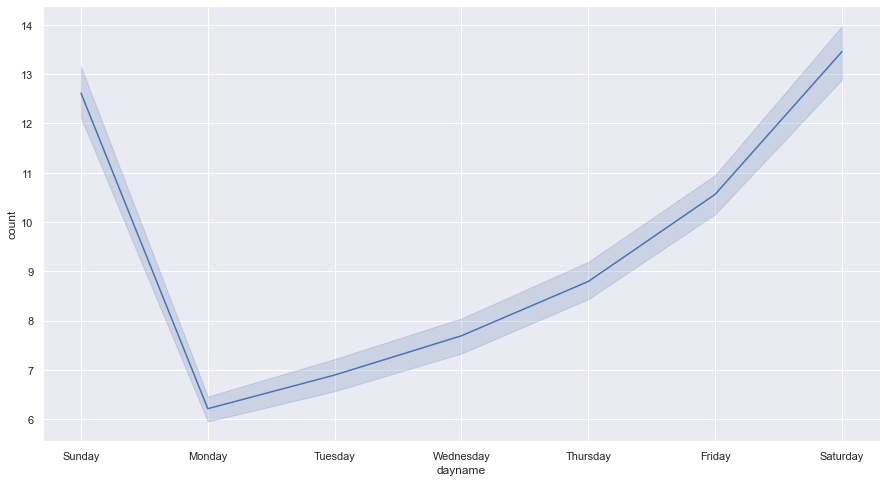

In [585]:
df_daysort = df.sort_values('dayname', key=lambda col: col.map({'Thursday':5,'Friday':6,'Saturday':7,'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4}))

sns.set(rc = {'figure.figsize':(15,8)})
days = sns.lineplot(data=df_daysort, x="dayname", y="count")

As with the 24-hour timeframe, there is a clear cyclical behavior for the days of the week. Login activity is at its peak over the weekend (Sat/Sun) before bottoming out to its lowest levels on Monday. Activity increases each day Tue-Friday before the cycle repeats. 

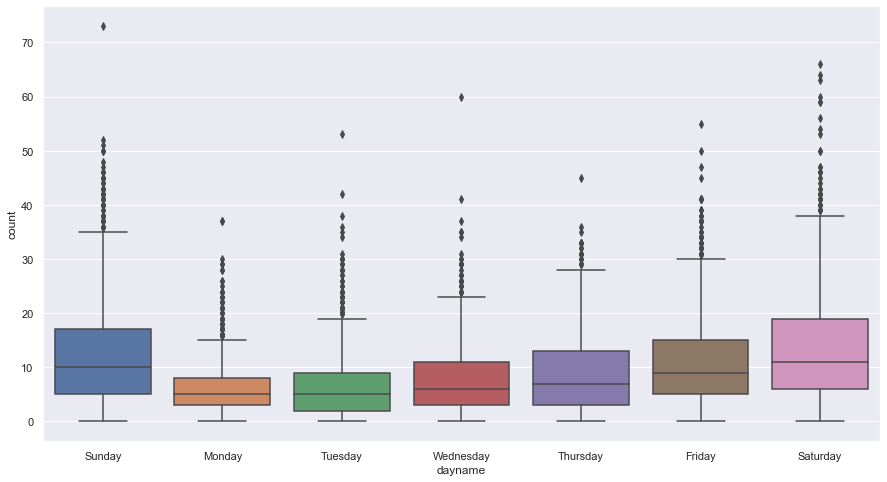

In [586]:
sns.boxplot(data=df_daysort, x='dayname', y='count');

In order to check for any intra-month trends, we can plot "day_of_month" for each of the 4 months in the dataset. Based on the chart below, there doesn't appear to be any discernible repeating pattern at this level of abstraction.

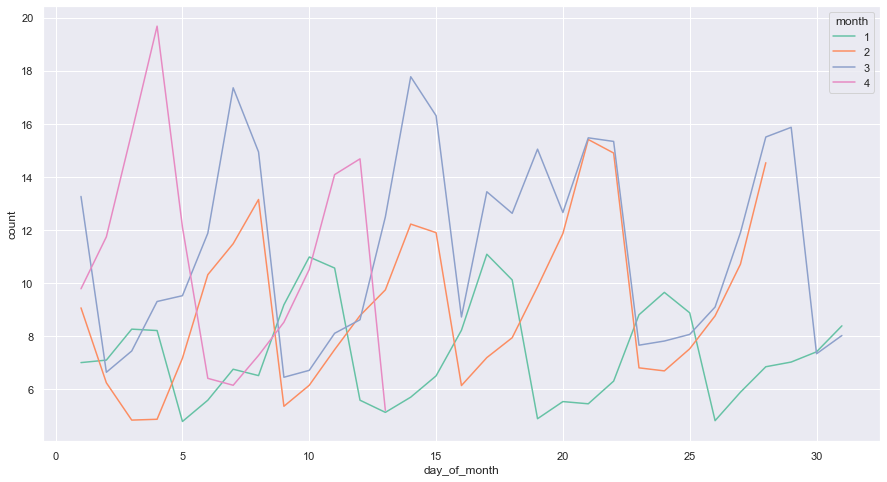

In [587]:
sns.set(rc = {'figure.figsize':(15,8)})
dom = sns.lineplot(data=df, x="day_of_month", y="count", hue='month', palette='Set2', ci=None)

In summary, the number of logins showed consistent growth from February through the last week in March, though with incomplete April data, it's as yet not fully clear whether the growth trend has stalled or will continue.

There is a consistent pattern to login activity on a 24-hour cycle, with a sustained peak overnight from 21:00 to 3:00, and a narrower peak around noon each day. Activity is at its lowest between 6:00 and 9:00 in the morning.

There is also a regular pattern at the weekly level, with login activity peaking on weekend days (Sat/Sun), bottoming out on Monday, and then rebounding each day going back into the weekend.

Volatility at the day-of-the-month level shows no new pattern aside from the already identified weekly cycle.



### Part 2 - Experiment and Metrics Design - Conceptual Challenge

Background information: Ultimate operates in both Metropolis and Gotham, but a toll bridge between the two cities tends to discourage drivers from working in both cities. Ultimate is trying to determine if a toll reimbursement strategy will encourage drivers to begin operating in both cities.

Levels of weekday customer activity are complementary in the two cities, with Gotham most active at night and Metropolis most active during the day. Weekend activity for both is basically equivalent.

---

1) The best key performance indicator to employ to evaluate the success of this experiment will depend on exactly what data is available.

Some potential measures that I assume Ultimate would have access to are:
- Volume of applications for toll reimbursement over time. This is the simplest measure revealing to what extent drivers are taking advantage of the new offer.
- Geolocation or address information for trip start and end points for drivers operating in either city. It would be trivial to determine whether a trip started in one city and ended in the other if this were available.
- If the geolocation data doesn't exist (or can't be leveraged for privacy or other reasons), trip distance might be the next best alternative. While both cities are large, it's safe to assume that *on average* a trip between cities will cover more distance than an intra-city trip. This could either be tracking the # of trips over a certain distance threshold for drivers in those cities, or tracking the average trip distance per driver over time. A sustained increase in either measure could imply an increase in city-to-city travel. 

In the end, I think the start/end geolocation data (if available), provides the best option for establishing a meaningful KPI. Given that the number of drivers, customers, and ride volume all likely vary widely over time, I would use the number of trips per driver originating in one city but ending in the other, aggregated by week and expressed as an average across the experiment term.

---

2a) The purpose of the experiment is to look for evidence of a change in behavior on a small-scale before deciding to roll out the reimbursement plan in full. I think the best way to accomplish this is to initially only have the reimbursements available for off-peak situations. 

With Gotham most active at night and Metropolis during the day, the heaviest flow would tend to occur in the early evening for the Metropolis->Gotham direction, and the overnight hours in the Gotham->Metropolis direction. These would likely be the time windows with the highest surge multipliers, and thus offer the greatest incentive for travel between the two cities. Therefore, if you structure the experiment so that the benefit only exists when the incentive is *lowest* and it still discernibly changes behavior, you can feel confident that it will succeed when rolled out at full-scale.

As such, I would recommend setting up the experiment such that toll reimbursement is only available for trips in the overnight hours (say midnight to 4AM) for trips originating in Metroplis, and in the early evening (say 4-8PM) for trips originating in Gotham. 

I would then take 3 months of trip data for the two cities, filter to only include the target directions and time windows, and use that as the baseline the experiment's results will be compared against. If at all possible, I would use data from the same time of year as the planned experiment to try to help insulate from seasonality effects. I would then communicate the terms of the reimbursement to the drivers, and then track the volume of trips matching our criteria (both in terms of total trips and trips per driver) over a term of 1-3 months. 

---

2b) To consider the experiment successful with respect to changing behavior, the mean of the experiment results (our sample) must be different from the mean of our historical data (our control) to the extent that the difference can be considered statistically significant, and thus not likely to be caused by chance alone. So in this case, we mean the difference in the average "target trips per week" across all Gotham and Metropolis drivers between the baseline data and the experiment term. 

There are several ways to determine whether a result is statistically significant, but the most common test is to compare the p-value to an acceptance threshold. The p-value represents the probability of observing purely by chance results as extreme as those you actually achieved. The most frequently used p-value threshold is 0.05, so I'd suggest adopting this for our experiment as well. 

---

2c) Once the results are analyzed and evaluated for significance, we can move forward with a recommendation based on the outcome.
-If our p-value is below 5%, we can feel confident that the reimbursement worked as desired and increased city-to-city traffic. I would therefore recommend Ultimate begin rolling out the program at a larger scale. This could either be a blanket reimbursement approval, or simply removing the origination point stipulation and sticking to the peak travel windows.
-If our p-value is above 5%, I would propose Ultimate choose one of two options depending on the financial ramifications of the experiment, as there's a possibility that the structure of the experiment created a situation where the incentives were *too* low to drive new behavior. If the first experiment was performed affordably and driver response was mostly positive, it might be worth pursuing a second experiment using a more relaxed set of off-peak hours. For instance, a daytime window (9AM-2PM) for travel originating in Metropolis and a nighttime window (3PM-8PM) for travel originating in Gotham is still "off-peak", but is no longer in the exact opposite direction of the highest traffic flows and could drive enough new trips to bring the p-value below 5%. 

One additional suggestion I would make is that reimbursement volume should be tracked alongside trip volume. That way, if it becomes clear target trip volume is increasing but reimbursements are flat or lagging, it could be a sign that there is an issue. This could mean that the reimbursement request process is too slow or complicated, or that drivers aren't fully aware which of their tolls are eligible to be reimbursed, either of which would require quick intervention.

### Part 3 - Predictive Modeling - Ultimate Inc. Customer Account Dataset


In [588]:
# Loading main json dataset into a Pandas dataframe
df = pd.read_json('D://Springboard/Take Home Challenges/ultimate_challenge/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Data Cleaning and Validation

The first thing we want to do is inspect our dataset to see what kinds of datatypes we have, and see if we have any missing data.

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [591]:
df.columns[df.isnull().any()].tolist()

['avg_rating_of_driver', 'phone', 'avg_rating_by_driver']

- We have four columns of string type: city and phone are expected, but we would expect signup_date and last_trip_date to be datetime objects, so we'll likely need to convert these. 
- Number of trips in first 30 days is an integer type, ultimate black user is a boolean, and the rest of our columns are floats.
- We have 8,122 null values in avg_rating_of_driver, 396 nulls in phone, and 201 nulls in avg_rating_by_driver.

We will address the null values first. For the two rating columns, the ratings can only range from 1-5, so it's reasonable to fill null records with the overall average for the column. 



In [592]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [593]:
# Filling avg_rating_of_driver null values with the sample mean
avg_avg_rating_of = df['avg_rating_of_driver'].mean()
df['avg_rating_of_driver'].fillna(avg_avg_rating_of, inplace = True)

In [594]:
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [595]:
# Filling avg_rating_by_driver null values with the sample mean
avg_avg_rating_by = df['avg_rating_by_driver'].mean()
df['avg_rating_by_driver'].fillna(avg_avg_rating_by, inplace = True)

For the phone column, we see a mix of about 70/30 iphone and android users. Unfortunately, we can't use any of the other information to clue us into which null values fall into either category. Since we don't want to potentially taint the phone data we do have, we'll instead fill nulls with 'Unknown' and keep them separate.

In [596]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [597]:
df.loc[df['phone'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.000000,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.000000,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.000000,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.300000,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.900000,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.000000,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.000000,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,4.601559,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.000000,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [598]:
df['phone'].fillna('Unknown', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Re-running df.info shows us that all null values have been populated.

Next we'll investigate each remaining column to check for extreme outliers or other data issues.

In [599]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

All records cleanly fall into one of three different city categories, which means this column is a good candidate for creating a dummy variable.

In [600]:
print(df['trips_in_first_30_days'].describe())
print(df['trips_in_first_30_days'].value_counts(bins=10))

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64
(-0.126, 12.5]    48750
(12.5, 25.0]       1063
(25.0, 37.5]        140
(37.5, 50.0]         33
(50.0, 62.5]         10
(62.5, 75.0]          3
(112.5, 125.0]        1
(100.0, 112.5]        0
(87.5, 100.0]         0
(75.0, 87.5]          0
Name: trips_in_first_30_days, dtype: int64


We notice a max value of 125 trips in the first 30 days, the equivalent of just over 4 trips per day. This seems high given the 75th percentile is only 3 for the whole month. There are 3 users in the 2-2.5 trips per day range, and another 180 in the 1-2 per day range, so there's clearly some skew to this measure. We'll hold onto the max value even though it's an outlier.

In [601]:
df['signup_date'].head()

0    2014-01-25
1    2014-01-29
2    2014-01-06
3    2014-01-10
4    2014-01-27
Name: signup_date, dtype: object

The signup date column is in string format, but one that's friendly toward conversion to datetime, so that's what we'll do next.

In [602]:
df['signup_date']=pd.to_datetime(df['signup_date'], format='%Y-%m-%d')
print(df['signup_date'].min(), df['signup_date'].max())

2014-01-01 00:00:00 2014-01-31 00:00:00


All signup dates fall within January 2014 as expected.

In [603]:
df['avg_surge'].describe()

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [604]:
df['avg_surge'].value_counts(bins=5)

(0.992, 2.4]    49699
(2.4, 3.8]        272
(3.8, 5.2]         27
(6.6, 8.0]          1
(5.2, 6.6]          1
Name: avg_surge, dtype: int64

In [605]:
df.loc[df['avg_surge'] > 5.3]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
13861,Winterfell,1,2014-01-01,1.0,8.00,2014-01-01,iPhone,100.0,False,100.0,5.77,5.0
30477,Winterfell,1,2014-01-01,5.0,5.75,2014-01-01,iPhone,100.0,False,100.0,1.98,5.0


Avg surge multiplier shows a max of 8 when the 75th percentile is only 1.05, which is notable. Looking at the value counts, though, we see that there are ~300 users over a 2.4 average, one other of which is also over 5.2. Both extremes appear to be from users with only one trip. Again, we'll err on the side of caution and keep the 8.0.

In [606]:
df['last_trip_date'].head()

0    2014-06-17
1    2014-05-05
2    2014-01-07
3    2014-06-29
4    2014-03-15
Name: last_trip_date, dtype: object

Last trip date strings are formatted in the same way that signup date's were, so we can easily convert again to datetime.

In [607]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'], format='%Y-%m-%d')

In [608]:
print(df['last_trip_date'].min(), df['last_trip_date'].max())

2014-01-01 00:00:00 2014-07-01 00:00:00


Last trip dates all fall between Jan 1 and July 1 2014, which seems reasonable.

In [609]:
df.loc[df['avg_dist'] > 100]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
534,King's Landing,0,2014-01-04,4.601559,1.0,2014-03-09,Unknown,0.0,False,0.0,129.89,5.000000
20701,Astapor,0,2014-01-25,4.601559,1.0,2014-06-26,Android,0.0,False,100.0,160.96,4.778158


In [610]:
df['surge_pct'].describe()

count    50000.000000
mean         8.849536
std         19.958811
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

Surge percent ranges from 0 to 100 with a heavy skew toward 0. Nothing seems out of place, so we'll keep it as-is.

In [611]:
df['weekday_pct'].describe()

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

Weekday percent ranges from 0 to 100 with a mean of 60.1%. Again, nothing sticks out as incorrect, so no changes made.

In [612]:
df['avg_dist'].describe()

count    50000.000000
mean         5.796827
std          5.707357
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max        160.960000
Name: avg_dist, dtype: float64

Similar to number of trips, avg distance looks like it might have an outlier. The max is 161 miles, but the 75th percentile is just under 7 miles.

In [613]:
df['avg_dist'].value_counts(bins=5)

(-0.162, 32.192]     49707
(32.192, 64.384]       283
(64.384, 96.576]         8
(128.768, 160.96]        2
(96.576, 128.768]        0
Name: avg_dist, dtype: int64

In [614]:
df.loc[df['avg_dist'] > 100]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
534,King's Landing,0,2014-01-04,4.601559,1.0,2014-03-09,Unknown,0.0,False,0.0,129.89,5.000000
20701,Astapor,0,2014-01-25,4.601559,1.0,2014-06-26,Android,0.0,False,100.0,160.96,4.778158


Again, we appear to just have a long-tail situation. Nearly 300 users have an average distance over 30 miles, and 2 of those are over 100. We will assume those are down to small sample size and keep them.

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

We have our two date columns in datetime format, but for the purpose of our modeling, it's the time delta between those dates and current day that we're actually interested in. 

We'll calculate "today's" date as 2014-07-02, 1 day more than the max "last_trip" record, and then use that to create new "days_since_last_trip" and "days_since_signup" columns. Our "active" flag indicating active users will be based on the "days_since_last_trip" column.

In [616]:
df['today'] = '2014-07-02'
df['today']= pd.to_datetime(df['today'], format='%Y-%m-%d')
df['days_since_last_trip'] = (df['today'] - df['last_trip_date']).dt.days
df['days_since_signup'] = (df['today'] - df['signup_date']).dt.days

In [617]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,today,days_since_last_trip,days_since_signup
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-02,15,158
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-02,58,154
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-02,176,177
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-02,3,173
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-02,109,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,2014-07-02,27,158
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,2014-07-02,158,159
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,2014-07-02,41,152
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,2014-07-02,168,169


In [618]:
# Creating an "active" column that's a boolean flag for whether a user is active
df['active'] = np.where(df['days_since_last_trip'] <= 30, True, False)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,today,days_since_last_trip,days_since_signup,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-02,15,158,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-02,58,154,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-02,176,177,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-02,3,173,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-02,109,156,False


#### Exploratory Data Analysis

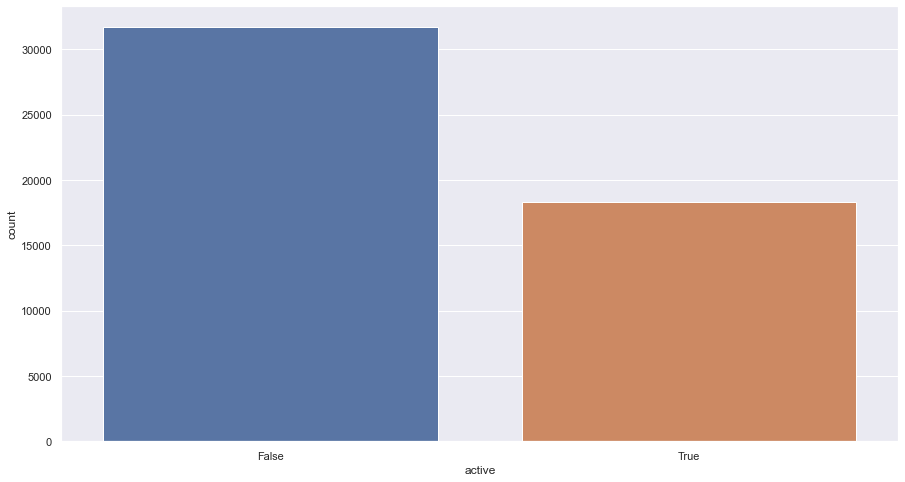

In [644]:
ax = sns.countplot(x='active', data=df)

From this countplot, we can see that our dataset is approximately 35% active users and 65% inactive users.

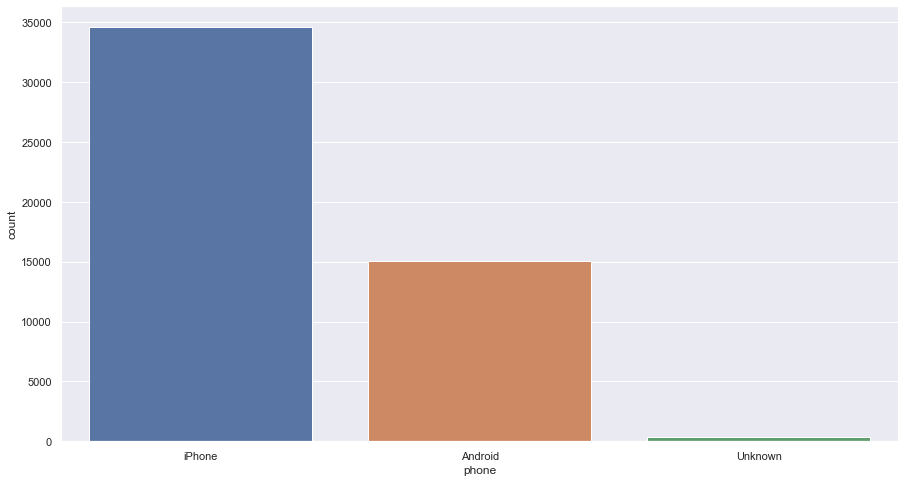

In [619]:
ax = sns.countplot(x='phone', data=df)

Here we see that we have a roughly 70/30 split of iPhone and Android users, with a much smaller portion where phone platform is unknown.

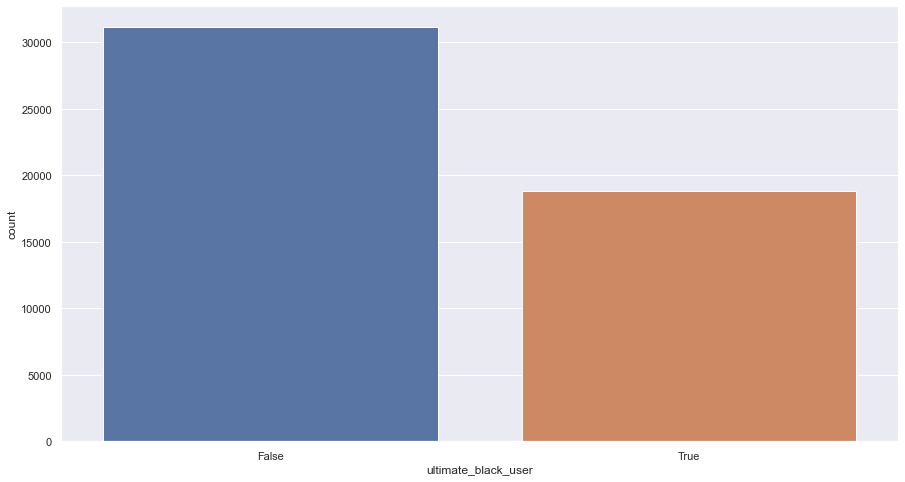

In [620]:
ax = sns.countplot(x='ultimate_black_user', data=df)

Similar to active/inactive, we see about 35% ultimate black users and 65% users who have not used the premium service.

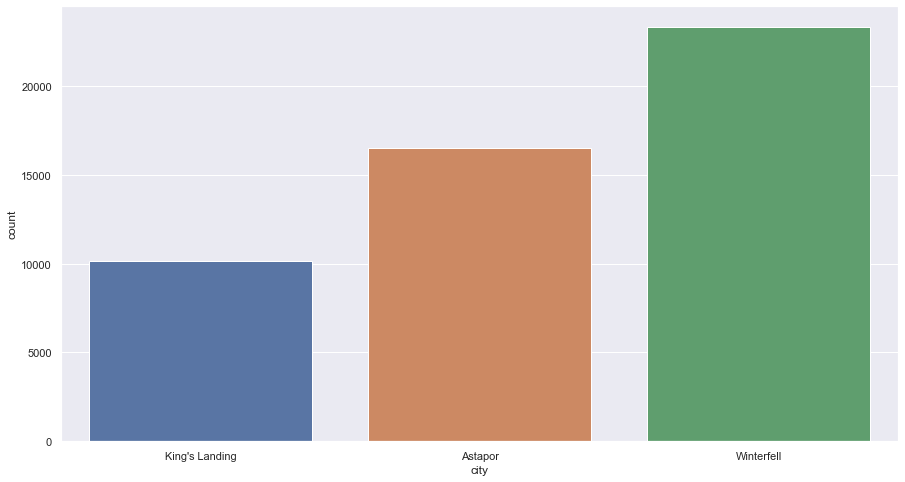

In [621]:
ax = sns.countplot(x='city', data=df)

Our dataset includes ~50% Winterfell users, 30% Astapor City users, and 20% King's landing users.

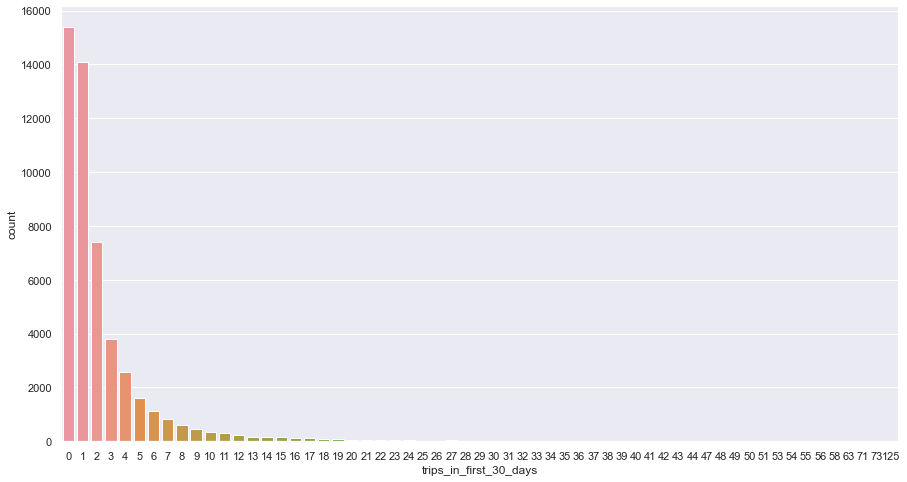

In [622]:
ax = sns.countplot(x='trips_in_first_30_days', data=df)

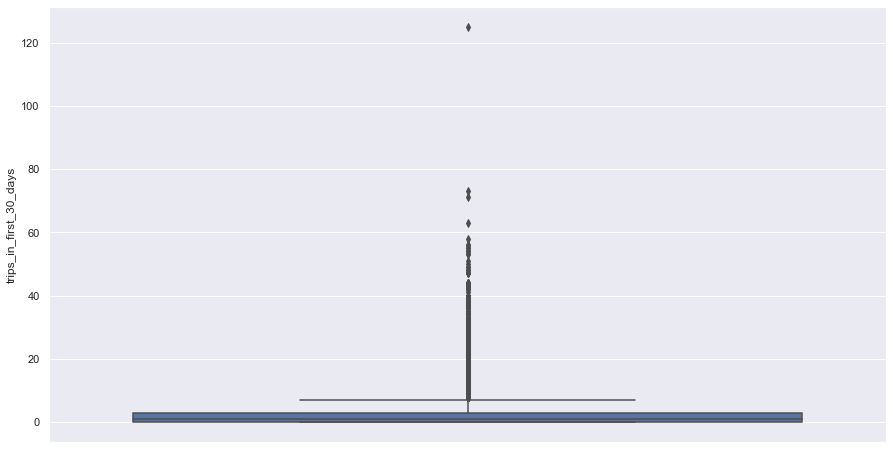

In [707]:
sns.boxplot(data=df, y='trips_in_first_30_days');

As we observed from our .describe() call earlier, our trips in first 30 days is highly clustered between 0 and 4, and with a very long tail off to the right.

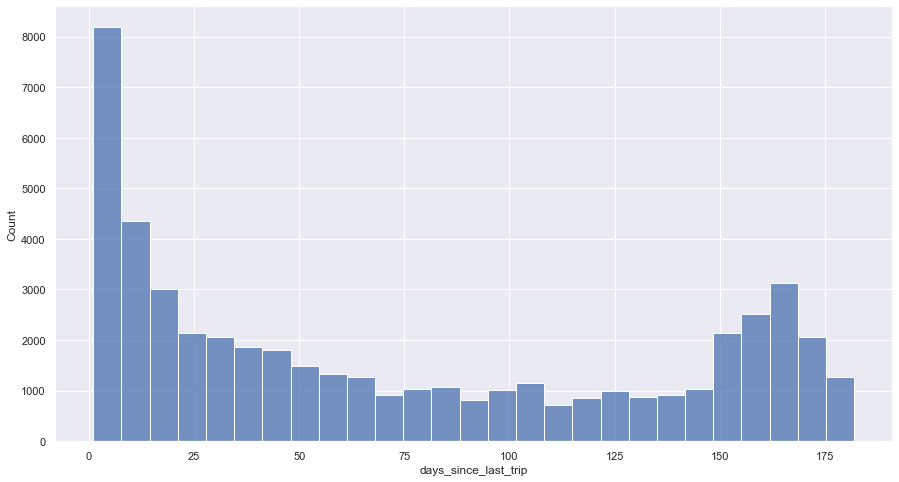

In [623]:
ax = sns.histplot(x='days_since_last_trip', data=df)

This histogram plot shows that while the main peak for number of days since last trip is between 0 and 5, there's also a second small peak representing users who haven't taken any trips since the initial 30-day window (150-180 days). Number of users starts to drop off after ~10 days, and the window from 75 days to 150 days is relatively flat (and therefore evenly distributed).

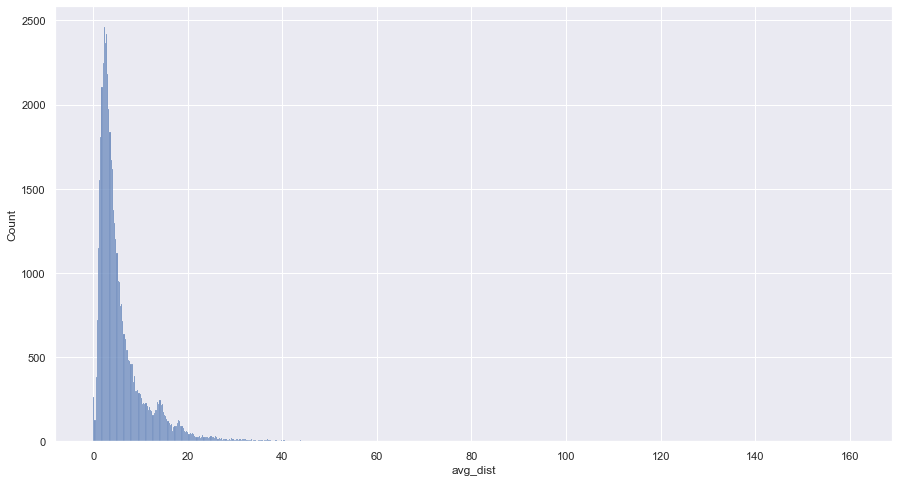

In [624]:
ax = sns.histplot(x='avg_dist', data=df)

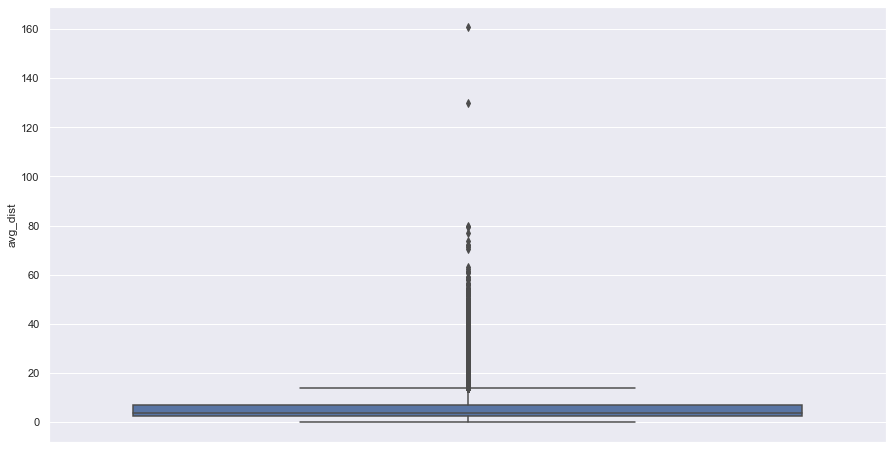

In [706]:
sns.boxplot(data=df, y='avg_dist');

This histogram of average distance shows that the distribution is tightly clustered between 0-20, with maximum user count at around 4 miles. We also see a long right-sloping tail that reaches all the way to 160 miles.

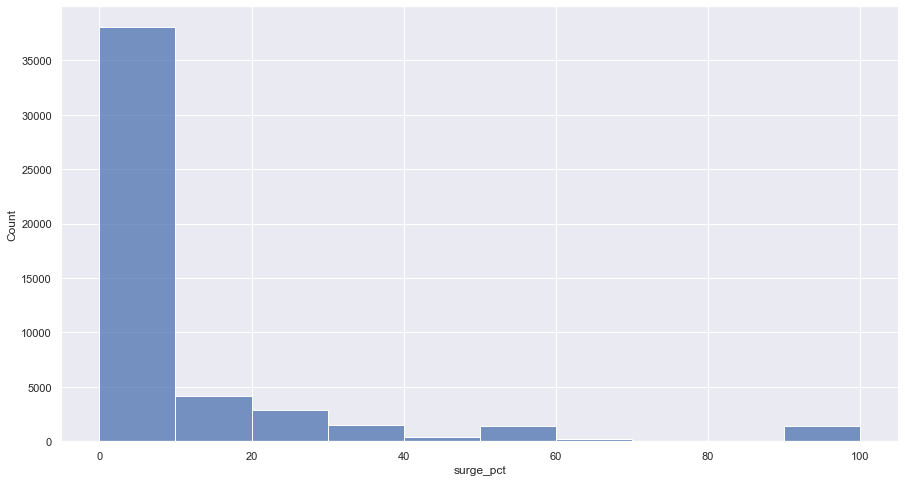

In [625]:
ax = sns.histplot(x='surge_pct', data=df, bins=10)

This surge percent histogram shows that the vast majority of users take 10% or less of their trips with a surge multiplier active. Most of the remaining users still use surge less than half the time.

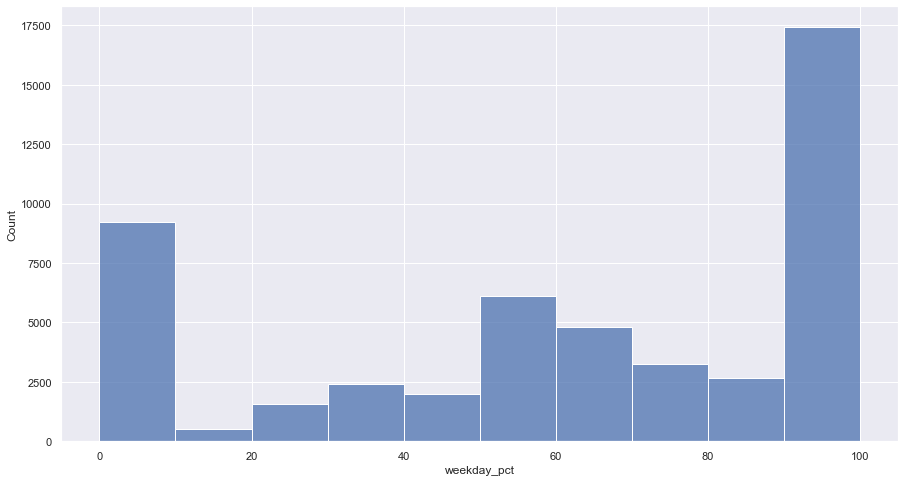

In [626]:
ax = sns.histplot(x='weekday_pct', data=df, bins=10)

This weekday percent histogram shows that the largest subset is users with 90-100% of their travel on weekdays. The second largest subset is the 0-10% bucket. Between these two extremes, we see a roughly bell shaped distribution centered slightly above 50%.

In [627]:
# Creating a correlation matrix from our dataframe
df_corr = df.corr()

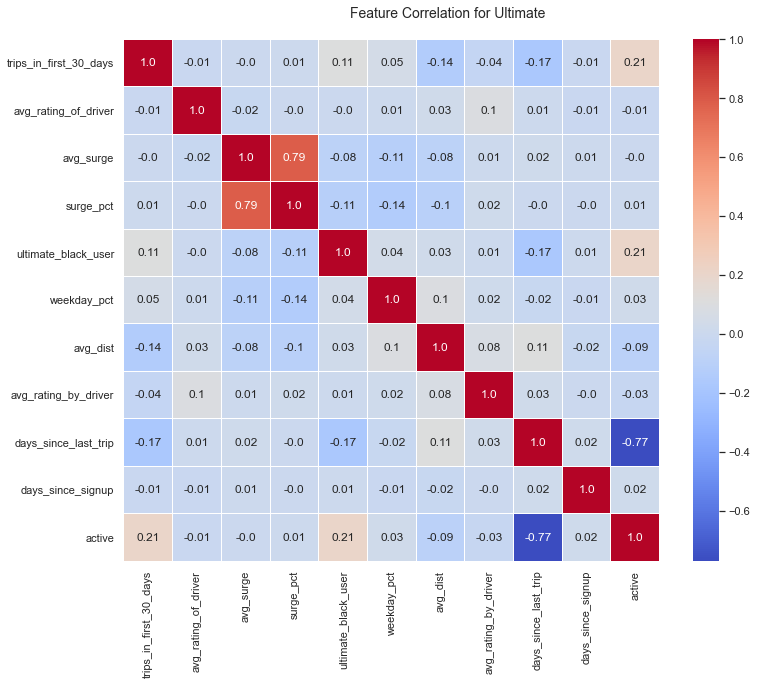

In [628]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(df_corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for Ultimate', fontsize=14)

Studying the correlation heatmap, we notice a few things:
- trips_in_first_30_days and ultimate_black_user are both correlated positively with our "active" flag at 0.21.
- days_since_last_trip and active are very strongly negatively correlated because the latter is based solely on the former. We'll need to drop this column before modeling.
- surge_pct and avg_surge are strongly correlated with each other, which makes sense. Same with weekday_pct and surge_pct.
- ultimate_black_user and days_since_last trip are negatively correlated with each other

Our last step before beginning to preprocess our data is:
- Dropping columns that we no longer need, namely the 3 date columns.
- We'll need to drop 'days_since_last_trip' as well, given that it's directly used in the calculation of our target variable. 

In [629]:
df.drop(['today'], axis=1, inplace=True)
df.drop(['last_trip_date'], axis=1, inplace=True)
df.drop(['signup_date'], axis=1, inplace=True)
df.drop(['days_since_last_trip'], axis=1, inplace=True)

Our first preprocessing step will be creating dummy variables from our two categorical measures, phone and city.

In [630]:
df = pd.get_dummies(df, columns=['city', 'phone'])

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  bool   
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   days_since_signup       50000 non-null  int64  
 9   active                  50000 non-null  bool   
 10  city_Astapor            50000 non-null  uint8  
 11  city_King's Landing     50000 non-null  uint8  
 12  city_Winterfell         50000 non-null  uint8  
 13  phone_Android           50000 non-null  uint8  
 14  phone_Unknown           50000 non-null

Next, we'll split our data into training and testing sets (80/20 split), and scale both using StandardScaler to ensure variations in column ranges won't skew our modeling results.

In [635]:
y = df['active']
X = df.drop(['active'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [637]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

Now we're ready to tune and fit models to our data and attempt to accurately predict 6-month retention. The general recommendation for Machine Learning applications is to use the simplest model that achieves satisfactory results.

Since this is a binary classification problem, we'll start first with Logistic Regression, and then if necessary, move on to K-Nearest Neighbors, Random Forest, and finally XGBoost. We'll evaluate the performance of each model, and then compare results across them. After selecting a model, we'll determine which features are the most important predictors of user retention.

### Logistic Regression

In [642]:
# Tuning penalty and C using RandomSearchCV

model = LogisticRegression()

penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
LR_params = dict(penalty=penalty,C=c_values)

rand_search = GridSearchCV(model, LR_params, scoring='f1', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_train)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'C': 100, 'penalty': 'none'}
0.5704733168584137


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [643]:
# Fitting the Logistic Regression model to the training data using the optimal parameters found in the previous step
LogReg = LogisticRegression(penalty = 'none', C = 100, random_state = 42)
LogReg.fit(X_train,y_train)

# Using model to predict on the test set
y_pred_LR = LogReg.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [648]:
conf_matrix = confusion_matrix(y_test,y_pred_LR)
print(conf_matrix)

LogReg_acc = accuracy_score(y_test, y_pred_LR)
LogReg_f1=f1_score(y_test,y_pred_LR)
LogReg_roc_auc = roc_auc_score(y_test, y_pred_LR)

print('The accuracy score for Logistic Regression is '+ str(round(LogReg_acc, 4)))
print('The f1 score for Logistic Regression is ' + str(round(LogReg_f1, 4)))
print('The score for area under the ROC for Logistic Regression is ' + str(round(LogReg_roc_auc, 4)))

[[6740 1184]
 [2276 2300]]
The accuracy score for Logistic Regression is 0.7232
The f1 score for Logistic Regression is 0.5707
The score for area under the ROC for Logistic Regression is 0.6766


### K-Nearest Neighbors

In [650]:
# K-Nearest-Neighbors
model = KNeighborsClassifier()

n_neighbors = list(range(1, 25))
metric = ['manhattan', 'euclidean']

KNN_params = dict(n_neighbors=n_neighbors,metric=metric)

rand_search = GridSearchCV(model, KNN_params, scoring='roc_auc', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_train)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'metric': 'manhattan', 'n_neighbors': 24}
0.8251919817615715


In [651]:
# Fitting the K-Nearest-Neighbors model to the training data using the optimal parameters found in the previous step
KNN = KNeighborsClassifier(n_neighbors = 24, metric='manhattan')
KNN.fit(X_train,y_train)

# Using model to predict on the test set
y_pred_KN = KNN.predict(X_test)

In [652]:
conf_matrix = confusion_matrix(y_test,y_pred_KN)
print(conf_matrix)

KNN_acc = accuracy_score(y_test, y_pred_KN)
KNN_f1=f1_score(y_test,y_pred_KN)
KNN_roc_auc = roc_auc_score(y_test, y_pred_KN)

print('The accuracy score for K-Nearest-Neighbors is '+ str(round(KNN_acc, 4)))
print('The f1 score for K-Nearest-Neighbors is ' + str(round(KNN_f1, 4)))
print('The score for area under the ROC for K-Nearest-Neighbors is ' + str(round(KNN_roc_auc, 4)))

[[6953  971]
 [1919 2657]]
The accuracy score for K-Nearest-Neighbors is 0.7688
The f1 score for K-Nearest-Neighbors is 0.6477
The score for area under the ROC for K-Nearest-Neighbors is 0.729


### Random Forest

In [653]:
# Random Forest
model = RandomForestClassifier()

max_features = list(range(1, 20))
max_depth = list(range(2, 9))
n_estimators = [10, 100, 1000]

RF_params = dict(max_features=max_features, n_estimators=n_estimators, max_depth=max_depth)

rand_search = GridSearchCV(model, RF_params, scoring='roc_auc', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_train)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'max_depth': 8, 'max_features': 6, 'n_estimators': 1000}
0.8500115865941744


In [656]:
# Fitting the Random Forest model to the training data using the optimal parameters found in the previous step
RF = RandomForestClassifier(max_features = 6, n_estimators = 1000, max_depth=8)
RF.fit(X_train,y_train)

# Using model to predict on the test set
y_pred_RF = RF.predict(X_test)

In [657]:
conf_matrix = confusion_matrix(y_test,y_pred_RF)
print(conf_matrix)

RF_acc = accuracy_score(y_test, y_pred_RF)
RF_f1=f1_score(y_test,y_pred_RF)
RF_roc_auc = roc_auc_score(y_test, y_pred_RF)

print('The accuracy score for Random Forest is '+ str(round(RF_acc, 4)))
print('The f1 score for Random Forest is ' + str(round(RF_f1, 4)))
print('The score for area under the ROC for Random Forest is ' + str(round(RF_roc_auc, 4)))

[[6861 1063]
 [1607 2969]]
The accuracy score for Random Forest is 0.7864
The f1 score for Random Forest is 0.6898
The score for area under the ROC for Random Forest is 0.7573


### XGBoost

In [663]:
# XGBoost
model = XGBClassifier()

eta = [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = list(range(2, 10))
min_child_weight = list(range(1,6))
gamma = list(range(0,5))
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

XGB_params = dict(eta=eta, max_depth=max_depth, min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, reg_alpha=reg_alpha)

rand_search = GridSearchCV(model, XGB_params, scoring='roc_auc', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_train)
print(rand_result.best_params_)
print(rand_result.best_score_)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'eta': 0.2, 'gamma': 4, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 0.1, 'subsample': 0.9}
0.8619726601620524


In [687]:
# Fitting the XGBoost model to the training data using the optimal parameters found in the previous step
XGB = XGBClassifier(eta=0.2, gamma=4, max_depth=5, min_child_weight=5, reg_alpha=0.1, subsample=0.9, importance_type='weight')
XGB.fit(X_train, y_train)

# Using model to predict on the test set
y_pred_XGB = XGB.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [688]:
conf_matrix = confusion_matrix(y_test,y_pred_XGB)
print(conf_matrix)

XGB_acc = accuracy_score(y_test, y_pred_XGB)
XGB_f1=f1_score(y_test,y_pred_XGB)
XGB_roc_auc = roc_auc_score(y_test, y_pred_XGB)

print('The accuracy score for XGBoost is '+ str(round(XGB_acc, 4)))
print('The f1 score for XGBoost is ' + str(round(XGB_f1, 4)))
print('The score for area under the ROC for XGBoost is ' + str(round(XGB_roc_auc, 4)))

[[6852 1072]
 [1474 3102]]
The accuracy score for XGBoost is 0.7963
The f1 score for XGBoost is 0.709
The score for area under the ROC for XGBoost is 0.7713


In [699]:
model_Labels = ['Logistic Regression','KNN', 'Random Forest', 'XGBoost']
acc_scores = [LogReg_acc, KNN_acc, RF_acc, XGB_acc]
f1_scores= [LogReg_f1, KNN_f1, RF_f1, XGB_f1]
ROC_Area = [LogReg_roc_auc, KNN_roc_auc, RF_roc_auc, XGB_roc_auc]

score_tab = pd.DataFrame(list(zip(model_Labels, acc_scores, f1_scores, ROC_Area)), 
               columns =['Algorithm', 'Accuracy', 'f1 Score', 'ROC-AUC score' ]) 

score_tab

,Algorithm,Accuracy,f1 Score,ROC-AUC score
0,Logistic Regression,0.72320,0.570720,0.676601
1,KNN,0.76880,0.647733,0.729049
2,Random Forest,0.78640,0.689823,0.757335
3,XGBoost,0.79632,0.709029,0.771300


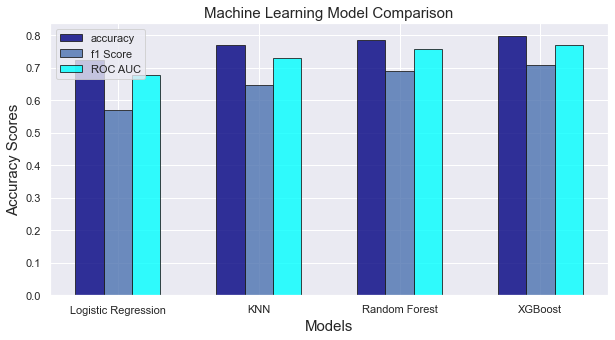

In [700]:
#plotting and comparing ROC-AUC train/test scores:
index=[1,2,3,4]
index_roc=[1.2,2.2,3.2,4.2]
index_acc=[0.8,1.8,2.8,3.8]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Accuracy Scores',fontsize=15)
plt.title('Machine Learning Model Comparison',fontsize=15)
_=plt.bar(index_acc, acc_scores, color='navy', alpha=0.8, label='accuracy', edgecolor='k', width=0.2)
_=plt.bar(index,f1_scores,color='b',alpha=0.8,label='f1 Score',edgecolor='k',width=0.2)
_=plt.bar(index_roc, ROC_Area,color='cyan',alpha=0.8,label='ROC AUC',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4], model_Labels)
plt.legend()
plt.show()

In the end, performance for Random Forest and XGBoost were similar, but with XGBoost holding a slight edge in all 3 scores. Given the number of hyperparameters to tune, the tuning process for XGBoost is the longest of the 4 models, but once tuned, the model actually runs fairly quickly.

For that reason, we'll move forward with our XGBoost model and determine which features make the best levers for increasing retention.

                  Features  Importance scores
13           phone_Unknown           0.000000
11         city_Winterfell           0.008705
14            phone_iPhone           0.016322
9             city_Astapor           0.025571
12           phone_Android           0.027203
10     city_King's Landing           0.032644
4      ultimate_black_user           0.033732
2                avg_surge           0.062024
7     avg_rating_by_driver           0.078346
1     avg_rating_of_driver           0.079434
8        days_since_signup           0.081066
3                surge_pct           0.085419
0   trips_in_first_30_days           0.123504
5              weekday_pct           0.147987
6                 avg_dist           0.198041


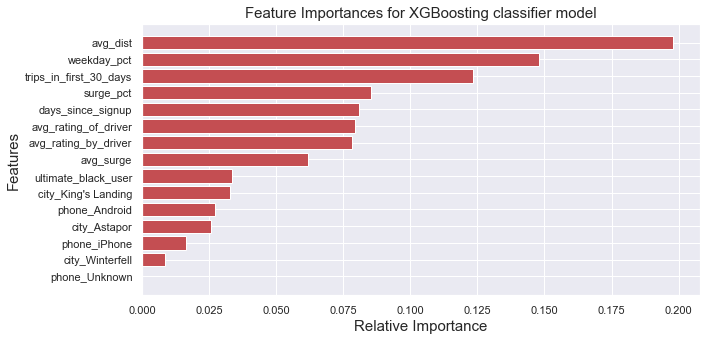

In [704]:
#Feature importances:

features = X
importances = list(XGB.feature_importances_)
tab=pd.DataFrame(list(zip(X,importances)),columns =['Features', 'Importance scores']) 
tab = tab.sort_values(by=['Importance scores'], ascending=True)
print(tab)


#Visual comparison:
plt.figure(figsize=(10,5))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
_=plt.barh(tab['Features'], tab['Importance scores'], align='center',color='r')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(tab['Features'])
plt.title('Feature Importances for XGBoosting classifier model',fontsize=15)
plt.show()

According to the Feature Importance output from our XGBoost Model, our 5 most important predictors of retention are:
- Average distance per trip
- Percent of weekday travel
- Trips in the first 30 days
- Surge percent
- Days since signup

This implies that the customers most likely to be active after 6 months spend more (or have a willingness to spend more) on the service, since surge percent and average distance per trip are tied to increased spending. These customers also tend to have a higher percentage of weekday travel and were more active on the service in the first 30 days than an average user.

Since increasing the 6-month retention rate is the objective, recommendations should focus on increasing these 5 measures first.

Perhaps the easiest of these to address is trips in the first 30 days. This could be tested with additional push notifications or emails to new users reminding them of the service, or encouraging travel to a certain event or location.

Average trip distance could also be improved by using marketing communications to customers below the average in this category suggesting travel points of interest outside their usual travel sphere. 

Percent of weekday travel could be addressed with messaging encouraging users to use Ultimate for their work commute. This would also have the secondary benefit of potentially increasing surge percent, as most of this travel would take place during rush hours.

Days since signup is not something that can actively be targeted, but reminders to users who exit the "active" userbase could make a difference in this case.